In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os, json
import matplotlib.pyplot as plt 
import matplotlib as mpl
%matplotlib inline 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz 
import graphviz
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections
from sklearn.metrics import confusion_matrix
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
Filetype=input('Load big file (1) or small file (2)? ')
if Filetype=='2' :
    data=pd.read_csv('data/Sdata_for_ML.csv',header=0)
else:
    data=pd.read_csv('data/Bdata_for_ML.csv',header=0)
data=data.drop(['Unnamed: 0',],axis=1)    

Load big file (1) or small file (2)? 1


In [ ]:
print(data.columns[240:])

## Tree ML

In [ ]:
mod1=data.drop(['is_starred','usd_pledged','pledge_perc','staff_pick','mean_pladge_in_category_last_year',
       'median_pladge_in_category_last_year',
       'mean_pladgePerc_in_category_last_year',
       'median_pladgePerc_in_category_last_year','category.name_3D Printing', 'category.name_Academic',
       'category.name_Accessories', 'category.name_Action',
       'category.name_Animals', 'category.name_Animation',
       'category.name_Anthologies', 'category.name_Apparel',
       'category.name_Apps', 'category.name_Architecture',
       'category.name_Art Books', 'category.name_Audio', 'category.name_Bacon',
       'category.name_Blues', 'category.name_Calendars',
       'category.name_Camera Equipment', 'category.name_Candles',
       'category.name_Ceramics', 'category.name_Children\'s Books',
       'category.name_Childrenswear', 'category.name_Chiptune',
       'category.name_Civic Design', 'category.name_Classical Music',
       'category.name_Comedy', 'category.name_Comic Books',
       'category.name_Community Gardens', 'category.name_Conceptual Art',
       'category.name_Cookbooks', 'category.name_Country & Folk',
       'category.name_Couture', 'category.name_Crochet', 'category.name_DIY',
       'category.name_DIY Electronics', 'category.name_Digital Art',
       'category.name_Documentary', 'category.name_Drama',
       'category.name_Drinks', 'category.name_Electronic Music',
       'category.name_Embroidery', 'category.name_Events',
       'category.name_Experimental', 'category.name_Fabrication Tools',
       'category.name_Faith', 'category.name_Family', 'category.name_Fantasy',
       'category.name_Farmer\'s Markets', 'category.name_Farms',
       'category.name_Festivals', 'category.name_Fiction',
       'category.name_Fine Art', 'category.name_Flight',
       'category.name_Food Trucks', 'category.name_Footwear',
       'category.name_Gadgets', 'category.name_Gaming Hardware',
       'category.name_Glass', 'category.name_Graphic Design',
       'category.name_Graphic Novels', 'category.name_Hardware',
       'category.name_Hip-Hop', 'category.name_Horror',
       'category.name_Illustration', 'category.name_Immersive',
       'category.name_Indie Rock', 'category.name_Installations',
       'category.name_Interactive Design', 'category.name_Jazz',
       'category.name_Jewelry', 'category.name_Kids', 'category.name_Knitting',
       'category.name_Latin', 'category.name_Letterpress',
       'category.name_Literary Journals', 'category.name_Literary Spaces',
       'category.name_Live Games', 'category.name_Makerspaces',
       'category.name_Metal', 'category.name_Mixed Media',
       'category.name_Mobile Games', 'category.name_Movie Theaters',
       'category.name_Music Videos', 'category.name_Musical',
       'category.name_Narrative Film', 'category.name_Nature',
       'category.name_Nonfiction', 'category.name_Painting',
       'category.name_People', 'category.name_Performance Art',
       'category.name_Performances', 'category.name_Periodicals',
       'category.name_Pet Fashion', 'category.name_Photo',
       'category.name_Photobooks', 'category.name_Places','category.name_Playing Cards', 'category.name_Plays',
       'category.name_Poetry', 'category.name_Pop', 'category.name_Pottery',
       'category.name_Print', 'category.name_Printing',
       'category.name_Product Design', 'category.name_Public Art',
       'category.name_Punk', 'category.name_Puzzles', 'category.name_Quilts',
       'category.name_R&B', 'category.name_Radio & Podcasts',
       'category.name_Ready-to-wear', 'category.name_Residencies',
       'category.name_Restaurants', 'category.name_Robots',
       'category.name_Rock', 'category.name_Romance',
       'category.name_Science Fiction', 'category.name_Sculpture',
       'category.name_Shorts', 'category.name_Small Batch',
       'category.name_Software', 'category.name_Sound',
       'category.name_Space Exploration', 'category.name_Spaces',
       'category.name_Stationery', 'category.name_Tabletop Games',
       'category.name_Taxidermy', 'category.name_Television',
       'category.name_Textiles', 'category.name_Thrillers',
       'category.name_Translations', 'category.name_Typography',
       'category.name_Vegan', 'category.name_Video', 'category.name_Video Art',
       'category.name_Video Games', 'category.name_Wearables',
       'category.name_Weaving', 'category.name_Web', 'category.name_Webcomics',
       'category.name_Webseries', 'category.name_Woodworking',
       'category.name_Workshops', 'category.name_World Music',
       'category.name_Young Adult', 'category.name_Zines','country_AT', 'country_AU', 'country_BE',
       'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES',
       'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT',
       'country_JP', 'country_LU', 'country_MX', 'country_NL', 'country_NO',
       'country_NZ', 'country_SE', 'country_SG','currency_AUD',
       'currency_CAD', 'currency_CHF', 'currency_DKK', 'currency_EUR',
       'currency_GBP', 'currency_HKD', 'currency_JPY', 'currency_MXN',
       'currency_NOK', 'currency_NZD', 'currency_SEK', 'currency_SGD','launched_at_day_in_week_1',
       'launched_at_day_in_week_2', 'launched_at_day_in_week_3',
       'launched_at_day_in_week_4', 'launched_at_day_in_week_5',
       'launched_at_day_in_week_6', 'launched_at_day_in_week_7',
       'deadline_day_in_week_1', 'deadline_day_in_week_2',
       'deadline_day_in_week_3', 'deadline_day_in_week_4',
       'deadline_day_in_week_5', 'deadline_day_in_week_6',
       'deadline_day_in_week_7'],axis=1)


In [ ]:
mod1.info()

In [ ]:
print(len(mod1))
corr_df=mod1.corr()
#corr_df[corr_df['state_num']==1]
#corr_df[(corr_df<1) & ((corr_df >= 0.3) | (corr_df <= -0.3)) ]

In [ ]:
cor_st=corr_df.loc['state_num']
print([cor_st.nsmallest(50)])
print([cor_st.nlargest(50)])


In [ ]:
print(cor_st.nsmallest(50).index)
print('')
print(cor_st.nlargest(50).index)

In [ ]:
mod1_params= mod1.columns.drop('state_num')

In [ ]:
Dtree_Params=mod1_params
train_df, test_df= train_test_split (mod1, test_size = 0.2, random_state=6)
Y_train = train_df["state_num"]
X_train = train_df[Dtree_Params]
Y_test=test_df["state_num"]
X_test=test_df[Dtree_Params]
tree_clf = DecisionTreeClassifier (max_depth = 3)
tree_clf.fit (X_train, Y_train)

Decision Tree visualization

In [ ]:
# Run the test set through the decision tree
Y2_test_Tree_predict = tree_clf.predict (X_test)  

#Test set conf matrix
conf_matrix_Testdata = confusion_matrix(Y_test, Y2_test_Tree_predict) 
print('Test set conf matrix is',conf_matrix_Testdata)

#Train set conf. matrix
conf_matrix_Traindata = confusion_matrix(Y_train, tree_clf.predict (X_train)) 
print('Train set conf matrix is',conf_matrix_Traindata)

from sklearn.metrics import precision_score, recall_score

print("The recall for the train set is ",recall_score(Y_train, tree_clf.predict (X_train)))
print("The recall for the test set tree is ",recall_score(Y_test, Y2_test_Tree_predict))
print("The precision for the train set tree is ",precision_score(Y_train, tree_clf.predict (X_train)))
print("The precision for the test tree is ",precision_score(Y_test, Y2_test_Tree_predict))

Y_test_proba = tree_clf.predict_proba(X_test)
print('Y_test_proba[:,1] is',Y_test_proba[:,1])

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_true = Y_test, probas_pred = Y_test_proba[:,1])
print(" Precision = ", precisions, "\n", "Recalls = ", recalls, "\n", "Thresholds = ", thresholds)

## Precision plot graph 

In [ ]:
def plot_precision_recall_vs_threshold (precisions, recalls, thresholds, color = "k", label = None):
    plt.plot (thresholds, precisions[:-1], color+"--", label="Precision "+label)
    plt.plot (thresholds, recalls[:-1], color+"-", label="Recall "+label)
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0,1])

In [ ]:
plot_precision_recall_vs_threshold( precisions, recalls, thresholds, color = "b", label="Full tree")
plt.legend(loc = "best")

## Roc Curve Plotting

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_proba[:,1])

In [ ]:
def plot_roc_curve (fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    
plot_roc_curve (fpr, tpr, "Full tree")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print("AUC for random guess is:   ", 0.5 )
print("AUC for the Full tree is: ", roc_auc_score(Y_test, Y_test_proba[:,1]) )

## Random forest (RF)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 250, max_depth = 10, n_jobs= -1)
rnd_clf.fit (X_train, Y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
confusion_matrix(Y_test, y_pred_rf)

In [ ]:
recall_score(Y_test, y_pred_rf)

In [ ]:
precision_score(Y_test, y_pred_rf)

In [ ]:
y_rf_proba = rnd_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_rf_proba[:,1])
plot_roc_curve (fpr, tpr, "Full tree")
plot_roc_curve (fpr_rf, tpr_rf, "Random Forest")
plt.legend(loc = "best")
plt.show()

In [ ]:
roc_auc_score(Y_test, y_rf_proba[:,1])

In [ ]:
feature_score = rnd_clf.feature_importances_
feature_score

In [ ]:
feature_names = list(X_train)
df_feature_score = pd.DataFrame(data=feature_names, columns=["feature"])
df_feature_score["score"]= feature_score
df_feature_score = df_feature_score.sort_values(by=['score'], ascending=False)
df_feature_score.head(30)
#df_feature_score_short=df_feature_score.drop(df_feature_score.index[12:])
#df_feature_score_short

In [ ]:
sns.barplot(y="feature", x="score", data=df_feature_score_short)

In [ ]:
Dtree_Params=mod1_params
train_df, test_df= train_test_split (mod1, test_size = 0.2, random_state=6)
Y_train = train_df["state_num"]
X_train = train_df[Dtree_Params]
Y_test=test_df["state_num"]
X_test=test_df[Dtree_Params]
tree_clf = DecisionTreeClassifier (max_depth = 3)
tree_clf.fit (X_train, Y_train)

In [ ]:
from sklearn.model_selection import validation_curve

param_range = (3,5,10,30)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(n_estimators=250), 
                                             X_train,
                                             Y_train.ravel(),
                                             param_name="max_depth", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
#plt.tight_layout()
plt.legend(loc="best")
plt.show()

## GBM

In [ ]:
from sklearn import ensemble

clf_gb = ensemble.GradientBoostingClassifier()
clf_gb.fit(X_train, Y_train)

In [ ]:
y_pred_gb = clf_gb.predict(X_test)

In [ ]:
confusion_matrix(Y_test, y_pred_gb)

In [ ]:
recall_score(Y_test, y_pred_gb)

In [ ]:
precision_score(Y_test, y_pred_gb)

In [ ]:
y_gb_proba = clf_gb.predict_proba(X_test)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(Y_test, y_gb_proba[:,1])

y_rf_proba = rnd_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_rf_proba[:,1])
plot_roc_curve (fpr, tpr, "Full tree")
plot_roc_curve (fpr_rf, tpr_rf, "Random Forest")
plot_roc_curve (fpr_gb, tpr_gb, "gradient boosting")
plt.legend(loc = "best")
plt.show()

## Precision graph plots for all methods

In [ ]:
precisions_GB, recalls_GB, thresholds_GB = precision_recall_curve(y_true = Y_test, probas_pred = y_gb_proba[:,1])
precisions_RF, recalls_RF, thresholds_RF = precision_recall_curve(y_true = Y_test, probas_pred = y_rf_proba[:,1])
precisions, recalls, thresholds = precision_recall_curve(y_true = Y_test, probas_pred = Y_test_proba[:,1])

plt.plot (thresholds, precisions[:-1], "r"+"--", label="Precision Full Tree")
plt.plot (thresholds, recalls[:-1], "r"+"-", label="Recall Full Tree ")
plt.plot (thresholds_GB, precisions_GB[:-1], "b"+"--", label="Precision GB")
plt.plot (thresholds_GB, recalls_GB[:-1], "b"+"-", label="Recall GB")
plt.plot (thresholds_RF, precisions_RF[:-1], "c"+"--", label="Precision RF")
plt.plot (thresholds_RF, recalls_RF[:-1], "c"+"-", label="Recall RF")

plt.xlabel("Threshold")
plt.legend(frameon=False)
plt.ylim([0,1])


## Prepare data for Regression

In [3]:
# Linear Regression imports
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score
lin_reg = LinearRegression()
from sklearn.metrics import mean_squared_error

In [ ]:
#define range of data
data_r=data[data['pledge_perc']<400]
data_r=data_r[data_r['pledge_perc']>100]
data_r=data_r[data_r['usd_pledged']>=8000]
data_r=data_r[data_r['usd_pledged']<=100000]

In [ ]:
data_r.info()

## Linear Regression

mask = data_r.columns.str.contains('category.name')
mask[1]=True #add goal to parameters
mask[4]=True #add staff pick to parameters
mask[34]=True 
mask[18]=True 
#mask[27]=True 
#mask[28]=True 
#mask[29]=True 
#mask[30]=True 
#mask[31]=True 
#mask[32]=True 

lin_reg_params=data_r.columns[mask]
lin_reg_params

#define parameters for regression
y = data_r [['usd_pledged']]
X = data_r[lin_reg_params]

#split to train and test
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.4, random_state=8)

#perform regression
lin_reg.fit(X_train, y_train)

print("predicted y = ", lin_reg.coef_, " * X + ", lin_reg.intercept_)

y_test_pred_numeric = lin_reg.predict(X_test)

lin_reg.score(X_test, y_test)
#R square score

r2_score(y_test, y_test_pred_numeric) #another method for r^2

mean_squared_error(y_test, y_test_pred_numeric)

plt.subplots(figsize=(25,20))
ax= sns.residplot(y_test, y_test-y_test_pred_numeric, color="g")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":25,"axes.labelsize":20,'xtick.labelsize': 16.0})
ax.set(xlabel='Y-test', ylabel='Residual = Y-predicted - Y-test',title="Linear Regression")

# Polynomial Regression

corr_r=data_r.corr()
corr_r=corr_r.loc['state_num']
print([corr_r.nsmallest(50)])
print([corr_r.nlargest(50)])


print(corr_r.nsmallest(50).index)
print('')
print(corr_r.nlargest(50).index)

# model 1-Conservative prediction 


In [4]:
#define range of data
data_r=data[data['pledge_perc']>100]
data_r=data_r[data_r['pledge_perc']<250]
data_r=data_r[data_r['usd_pledged']>=1000]
data_r=data_r[data_r['usd_pledged']<=80000]
print(len(data_r))
corr_df=data_r.corr()
cor_st=corr_df.loc['usd_pledged']
print(cor_st.nsmallest(15).index)
print('')
print(cor_st.nlargest(25).index)

66001
Index(['goal_ratio', 'category.slug_music', 'category.slug_art',
       'median_pladgePerc_in_category_last_year', 'category.name_Shorts',
       'category.slug_publishing', 'category.name_Indie Rock',
       'category.name_Rock', 'category.name_Fiction',
       'category.name_Comic Books', 'category.name_Performance Art',
       'category.name_Country & Folk', 'category.name_Painting',
       'category.name_Performances', 'category.slug_theater'],
      dtype='object')

Index(['usd_pledged', 'goal_500', 'goal_10', 'goal_1000', 'goal', 'staff_pick',
       'mean_pladge_in_category_last_year',
       'median_goal_in_category_last_year', 'category.slug_technology',
       'mean_goal_in_category_last_year', 'category.name_Hardware',
       'category.name_Product Design', 'category.name_Gadgets',
       'launched_at_yr', 'deadline_yr', 'category.name_Video Games',
       'category.slug_games', 'created_at_yr', 'category.slug_food',
       'launched-created', 'category.slug_design', '

0.9318231796293145


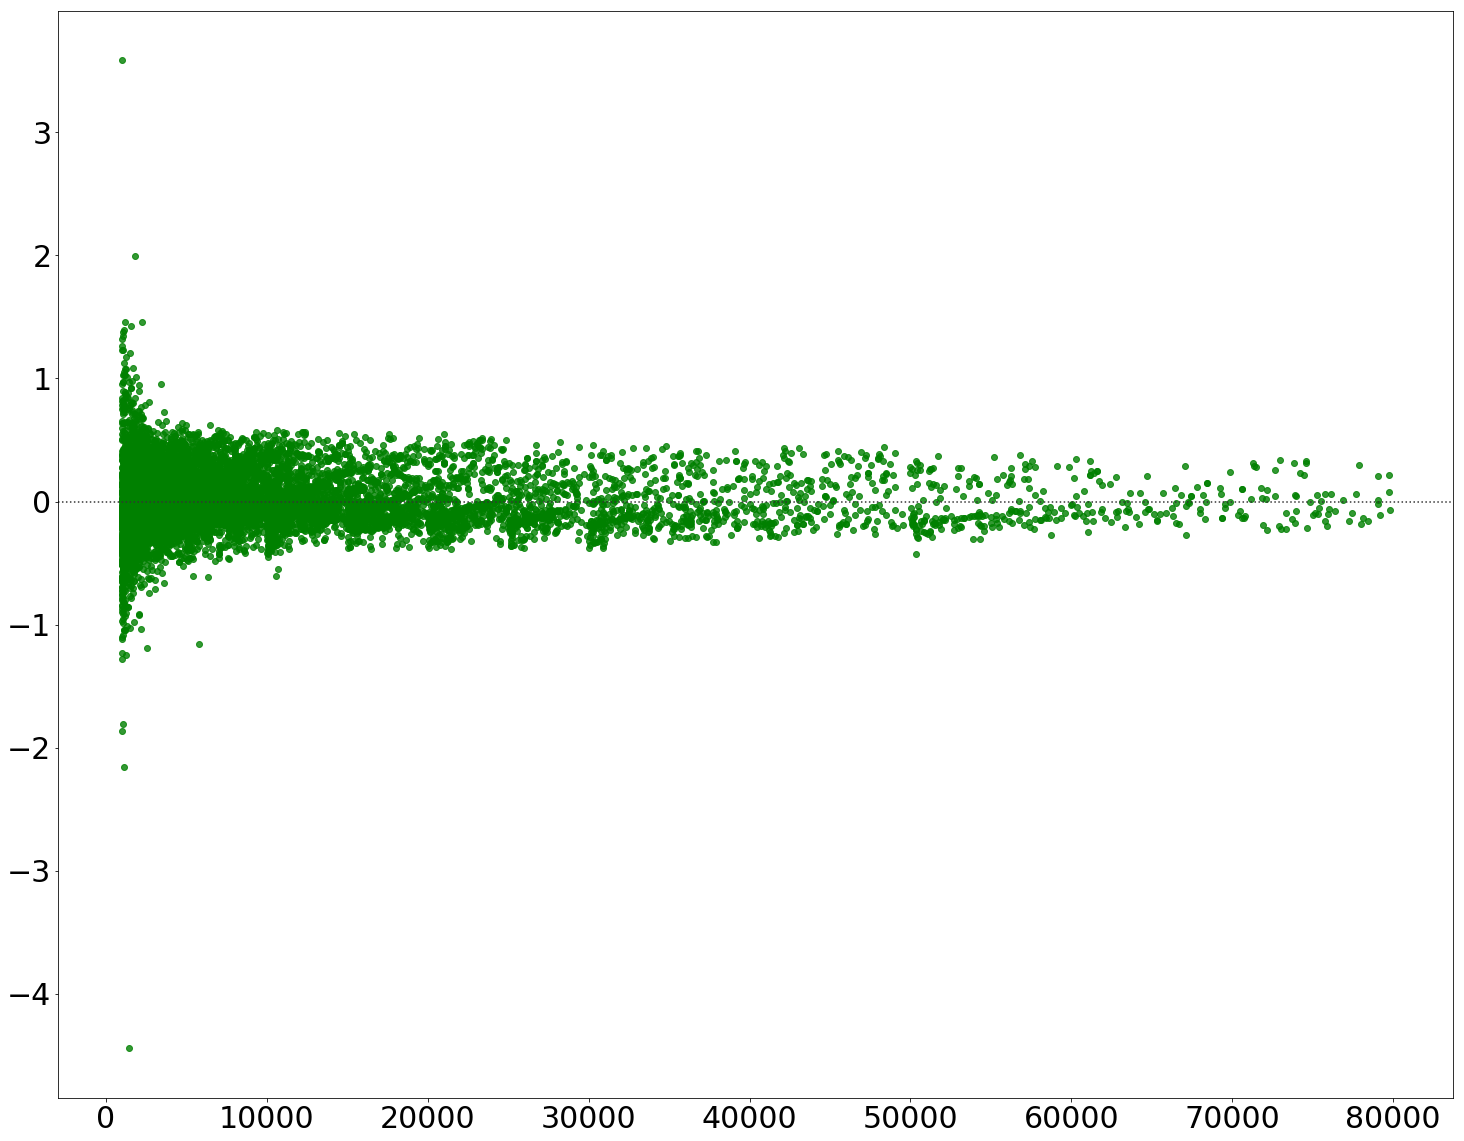

In [5]:
#define parameters for regression
y = data_r [['usd_pledged']]
X = data_r[['country_GB',
       'Last_Week','Last_Month',
       'Last_Year','Last_6_Month',
       'mean_goal_in_category_last_year',
       'median_goal_in_category_last_year',
       'mean_pladge_in_category_last_year',
       'median_pladge_in_category_last_year',
       'mean_pladgePerc_in_category_last_year',
       'median_pladgePerc_in_category_last_year',
       'goal_ratio',
       'name_len','deadline_yr', 'launched_at_yr',
       'name_non_character', 'goal',
       'deadline_hr', 'goal_1000','country_US', 'launched-created',
       'category.slug_music','category.slug_design','category.slug_technology','category.name_Science Fiction', 
       'category.slug_publishing', 'blurb_number_of_word', 'blurb_vowel_ratio']]
#split to train and test
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state=8)

# PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=2)
X_train_p = poly.fit_transform(X_train)
X_test_p = poly.fit_transform(X_test)

# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_train_p, y_train)

# Obtain coefficients
#lg.coef_

# Predict
y_test_pred_numeric_p=lg.predict(X_test_p)

print(r2_score(y_test, y_test_pred_numeric_p))

plt.subplots(figsize=(25,20))
ax= sns.residplot(y_test, (y_test-y_test_pred_numeric_p)/y_test, color="g")
sns.set_context("poster", rc={"font.size":50,"axes.titlesize":50,"axes.labelsize":50,'xtick.labelsize': 30.0})
#ax.set(xlabel='Y-test', ylabel='Residual% = (Y-predicted - Y-test)/Y-Test',title="Pledge prediction")
plt.tick_params(axis='both', labelsize=30)

In [6]:
X_train = X_train.values
y_train = y_train.values
X_test  =X_test.values
y_test  =y_test.values

In [7]:
from sklearn.ensemble import RandomForestRegressor #In classification we used RandomForestClassifier

rnd_clf = RandomForestRegressor(n_estimators = 100, max_depth = 9, n_jobs= -1)
rnd_clf.fit (X_train, y_train.ravel())
y_pred_rf = rnd_clf.predict(X_test)

In [8]:
mean_squared_error(y_test, y_pred_rf)

9855327.527487159

In [9]:
rnd_clf.score(X_test, y_test)

0.9330800975003944

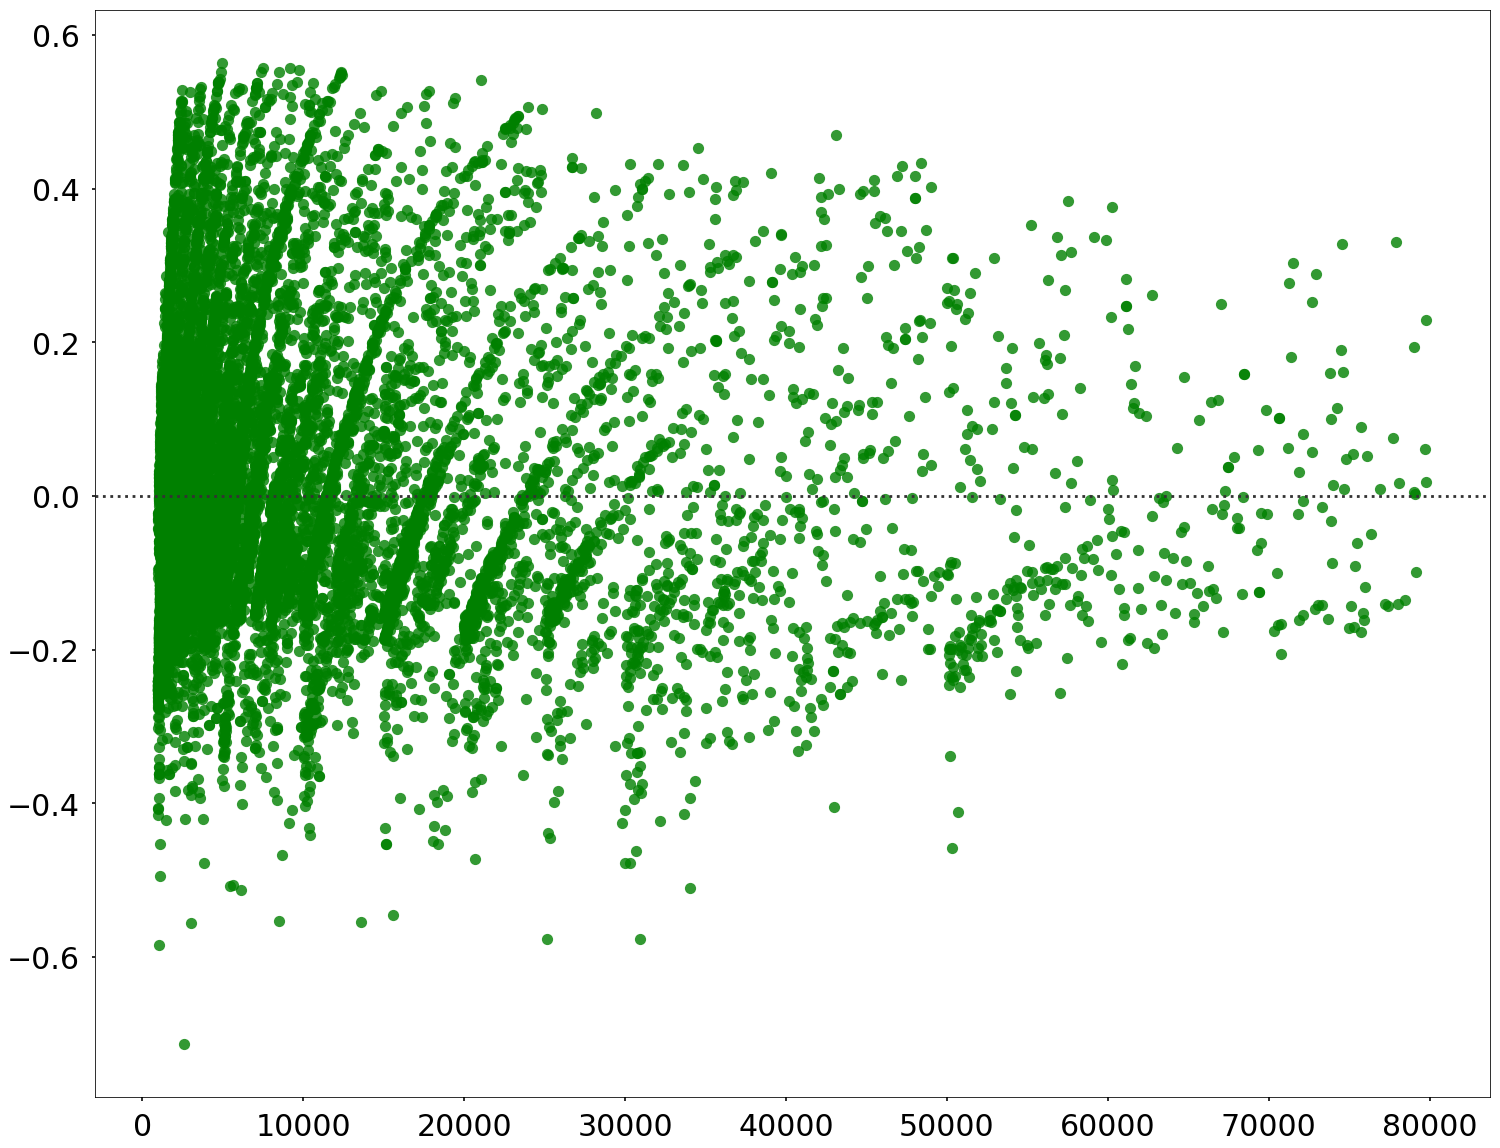

In [10]:
plt.subplots(figsize=(25,20))
ax= sns.residplot(y_test.ravel(), (y_test.ravel()-y_pred_rf)/y_test.ravel(), color="g")
sns.set_context("poster", rc={"font.size":50,"axes.titlesize":50,"axes.labelsize":50,'xtick.labelsize': 30.0})
#ax.set(xlabel='Y-test', ylabel='Residual% = (Y-predicted - Y-test)/Y-Test',title="Pledge prediction")
plt.tick_params(axis='both', labelsize=30)

In [ ]:
from sklearn.model_selection import validation_curve

param_range = [5, 6, 7, 8, 9,20]     #These are the examined values to max_depth
train_scores, test_scores = validation_curve (estimator=RandomForestRegressor(n_estimators=50), 
                                              X=X_train, y=y_train.ravel(), 
                                              param_name='max_depth', param_range=param_range, cv=10)
train_mean = np.mean(train_scores, axis=1) # Vector of average scores
test_mean  = np.mean(test_scores, axis=1)
train_std  = np.std (train_scores, axis=1) # Vector of standard derivation
test_std   = np.std (test_scores, axis=1)


In [ ]:
plt.plot(param_range, train_mean, color = 'blue', linestyle = '--', marker = 'o', markersize=5, label='training R square')
plt.plot(param_range, test_mean,color = 'green', marker = 's', markersize=5, label='Cross validation R square')
plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha = 0.2, color='blue')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha = 0.2, color='green')
plt.ylabel ('Score = R Square')
plt.ylim([0.7,1])
plt.xlabel ('max_depth')
plt.legend()

In [ ]:
rnd_clf.feature_importances_


In [ ]:
feature_score = rnd_clf.feature_importances_
df_feature_score = pd.DataFrame(data=X.columns, columns=["feature"])
df_feature_score["score"]= feature_score
df_feature_score = df_feature_score.sort_values(by=['score'], ascending=False)
df_feature_score

# model 2- Risky prediction 


In [ ]:
#define range of data
data_r=data[data['pledge_perc']>100]
data_r=data_r[data_r['pledge_perc']<500]
data_r=data_r[data_r['usd_pledged']>=1000]
data_r=data_r[data_r['usd_pledged']<=100000]
print(len(data_r))
corr_df=data_r.corr()
cor_st=corr_df.loc['usd_pledged']
print(cor_st.nsmallest(15).index)
print('')
print(cor_st.nlargest(25).index)

#define parameters for regression
y = data_r [['usd_pledged']]
X = data_r[['country_GB',
       'Last_Week','Last_Month',
       'Last_Year','Last_6_Month',
       'mean_goal_in_category_last_year',
       'median_goal_in_category_last_year',
       'mean_pladge_in_category_last_year',
       'median_pladge_in_category_last_year',
       'mean_pladgePerc_in_category_last_year',
       'median_pladgePerc_in_category_last_year',
       'goal_ratio',
       'name_len','deadline_yr', 'launched_at_yr',
       'name_non_character', 'goal',
       'deadline_hr', 'goal_1000','country_US', 'launched-created',
       'category.slug_music','category.slug_design','category.slug_technology','category.name_Science Fiction', 
       'category.slug_publishing', 'blurb_number_of_word', 'blurb_vowel_ratio']]
#split to train and test
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state=8)

# PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=2)
X_train_p = poly.fit_transform(X_train)
X_test_p = poly.fit_transform(X_test)

# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_train_p, y_train)

# Obtain coefficients
#lg.coef_

# Predict
y_test_pred_numeric_p=lg.predict(X_test_p)

print(r2_score(y_test, y_test_pred_numeric_p))

plt.subplots(figsize=(25,20))
ax= sns.residplot(y_test, (y_test-y_test_pred_numeric_p)/y_test, color="b")
sns.set_context("poster", rc={"font.size":30,"axes.titlesize":30,"axes.labelsize":40,'xtick.labelsize': 16.0})
ax.set(xlabel='Y-test', ylabel='Residual% = (Y-predicted - Y-test)/Y-Test',title="Polynomial Regression")